 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
print(whale_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [7]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
print(algo_returns_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [10]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(ascending = True, inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','').astype("float")
sp500_history_df.sort_index(ascending=True, inplace = True)
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Count Nulls
print(sp500_history_df.isnull().sum())
# Drop nulls
'''
There are no nulls to drop
'''

Close    0
dtype: int64


'\nThere are no nulls to drop\n'

In [17]:
# Rename Column
sp500_daily_returns_df.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500_daily_returns_df.head(6)

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df], axis = "columns", join = "inner")
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

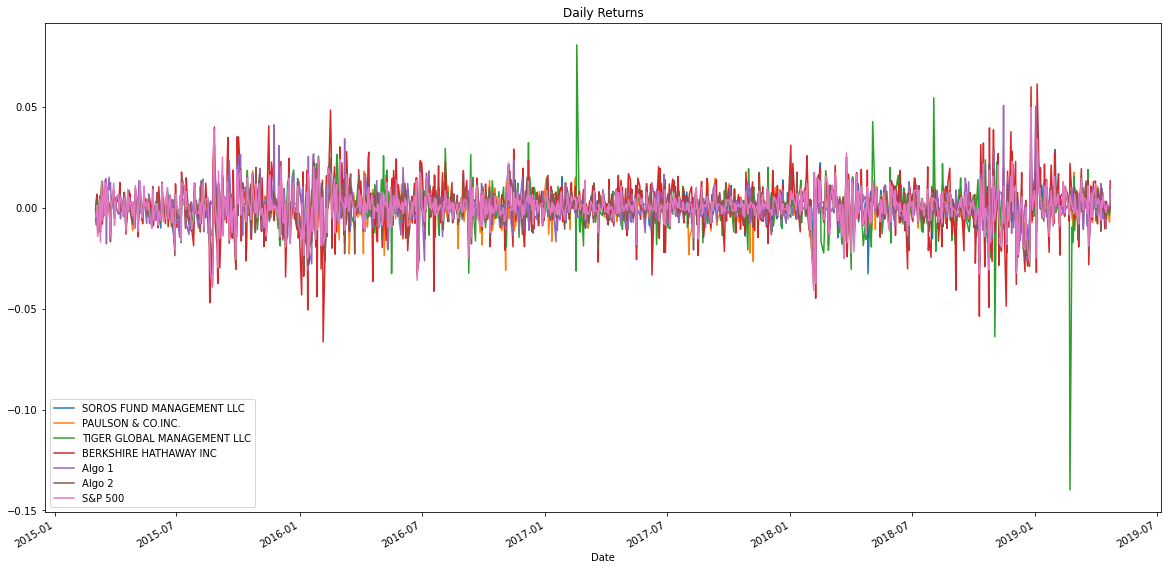

In [19]:
# Plot daily returns
daily_returns_df.plot(figsize = (20,10), title='Daily Returns')

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

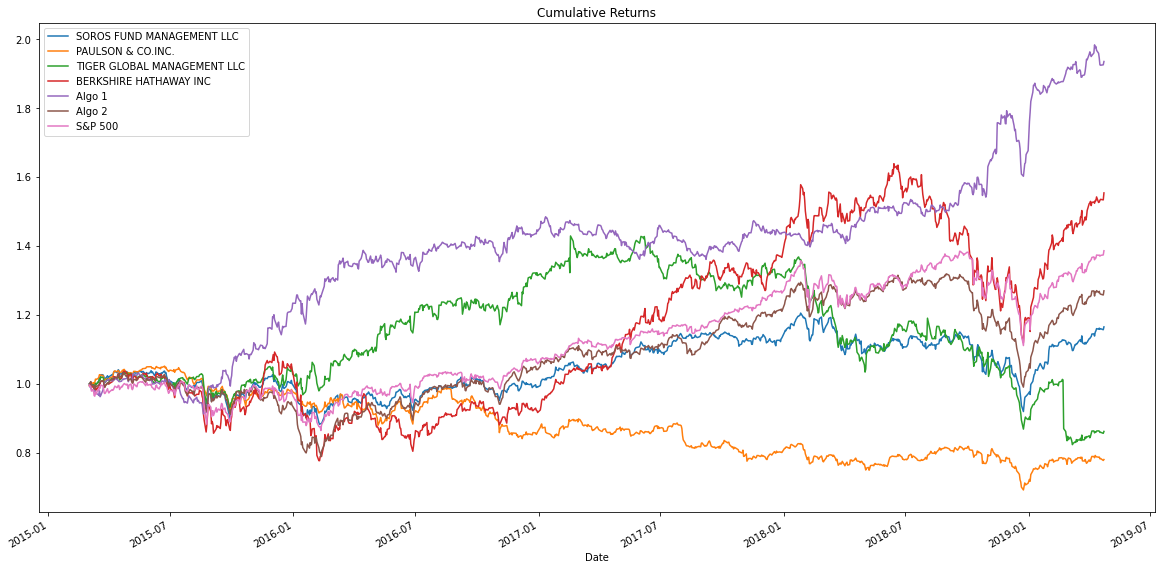

In [20]:
# Plot cumulative returns
cumulative_returns_df = (1+ daily_returns_df).cumprod()
cumulative_returns_df.plot(figsize = (20,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

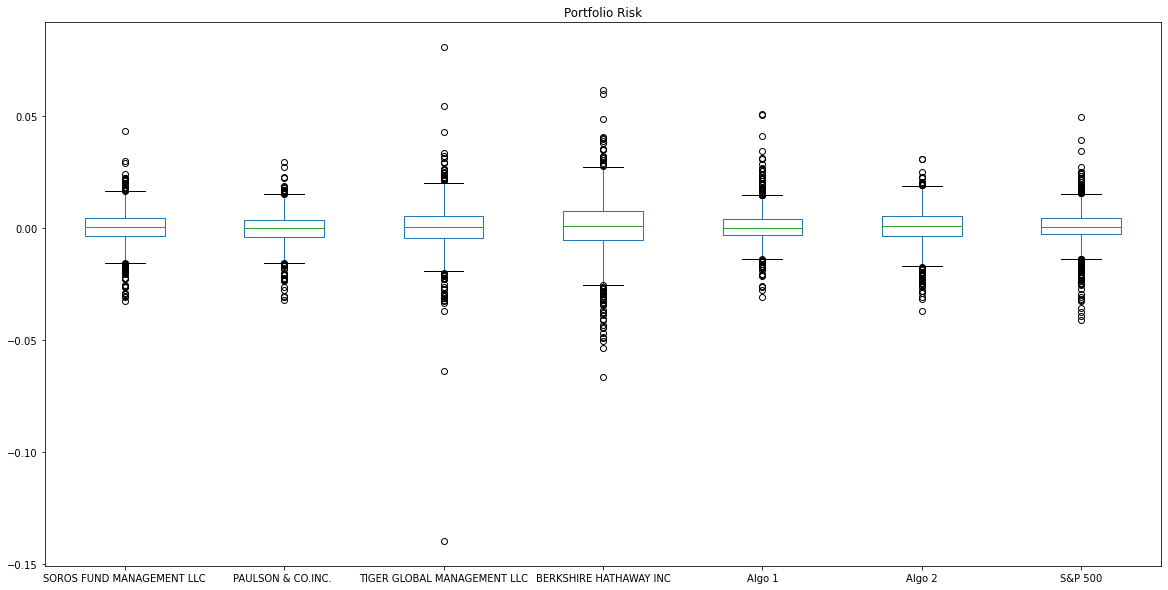

In [21]:
# Box plot to visually show risk
daily_returns_df.plot(kind = "box", figsize = (20,10), title='Portfolio Risk')

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_returns_std_df = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"STD"})
daily_returns_std_df


,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [ ]:
# Which portfolios are riskier than the S&P 500?

**Visually inspecting the output, the portfolio's riskier than the S&P500 are: Tiger Global Management and Berkshire Hathaway**

In [24]:
# Determine which portfolios are riskier than the S&P 500
daily_returns_std_df.gt(daily_returns_std_df.loc["S&P 500"])

,STD
SOROS FUND MANAGEMENT LLC,False
PAULSON & CO.INC.,False
TIGER GLOBAL MANAGEMENT LLC,True
BERKSHIRE HATHAWAY INC,True
Algo 1,False
Algo 2,False
S&P 500,False


In [25]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_annualized_std_df = daily_returns_std_df*np.sqrt(252)
daily_returns_annualized_std_df

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

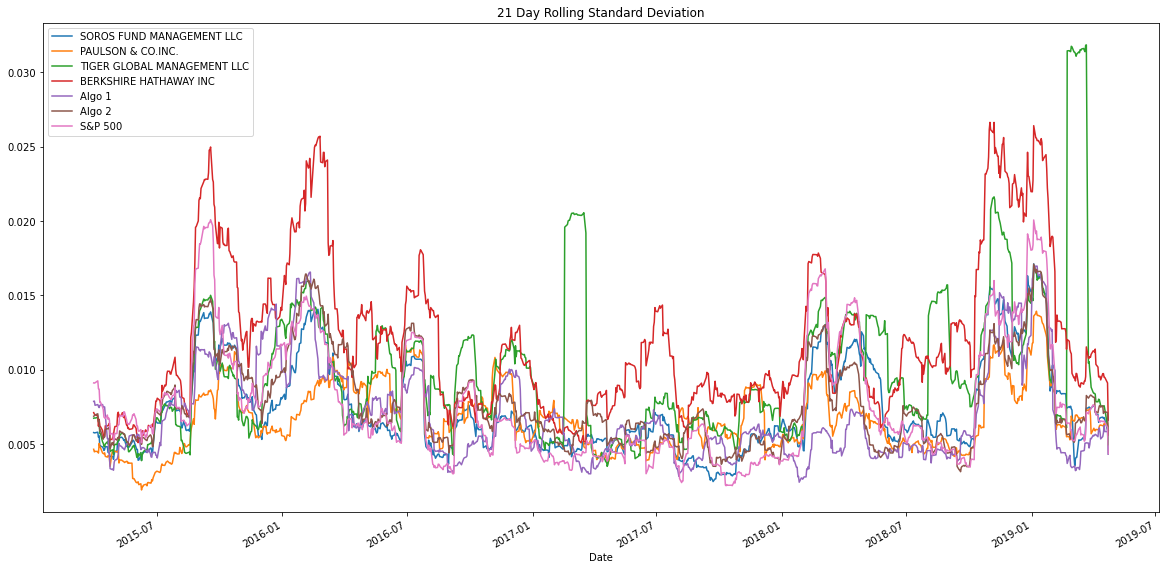

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
daily_returns_df.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

In [27]:
# Construct a correlation table
correlation_df = daily_returns_df.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

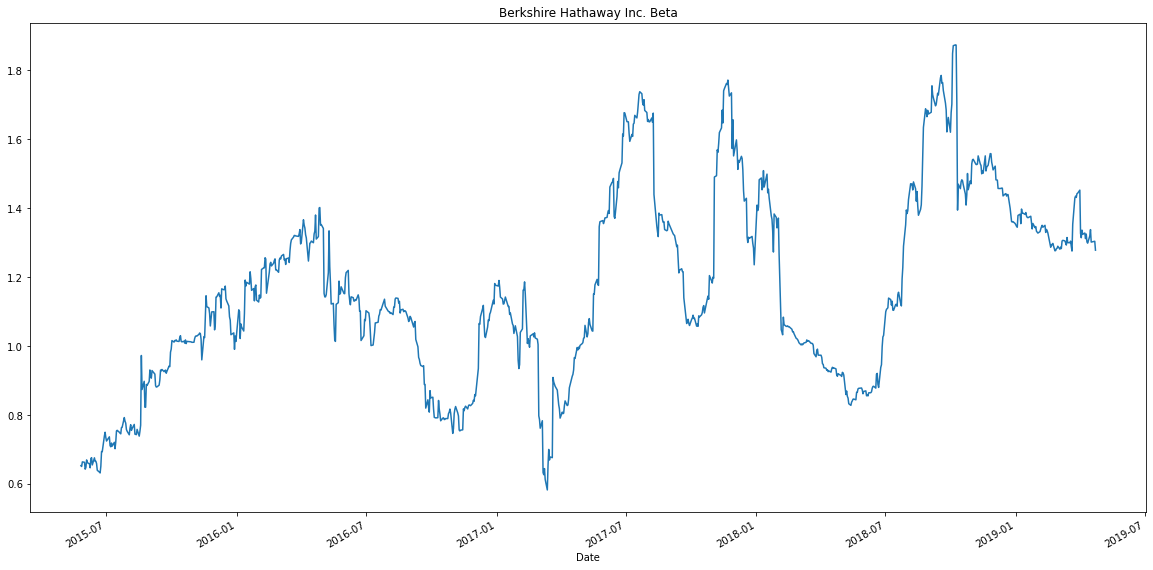

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance_df = daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_df['S&P 500'])
rolling_variance_df = daily_returns_df['S&P 500'].rolling(window=60).var()
rolling_beta_df = rolling_covariance_df / rolling_variance_df
rolling_beta_df.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

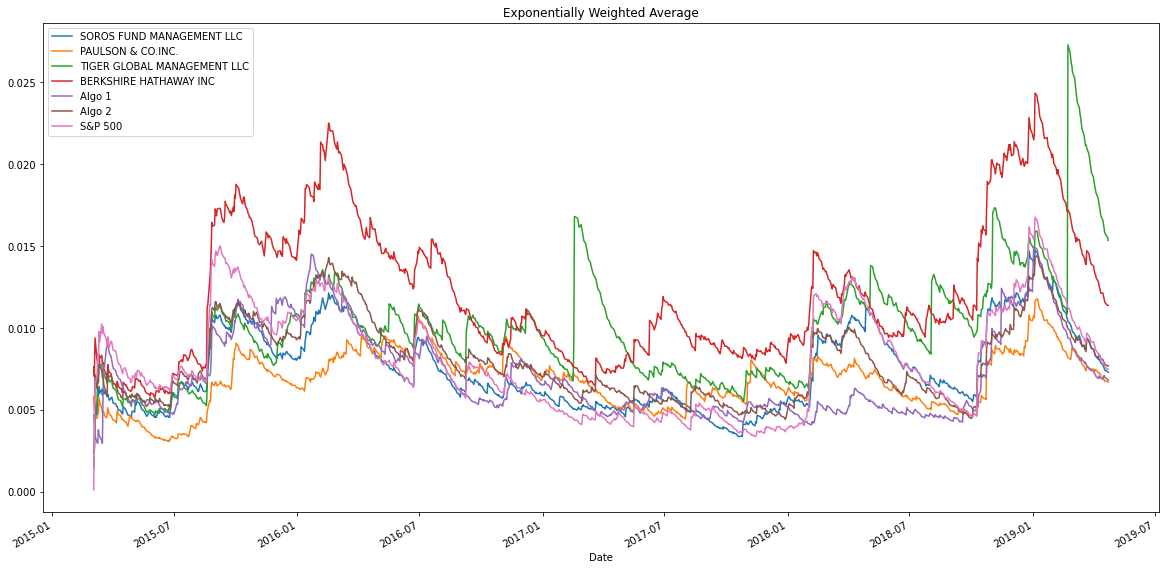

In [29]:
# Calculate a rolling window using the exponentially weighted moving average. 
daily_returns_df_ewm = daily_returns_df.ewm(halflife=21).std()
daily_returns_df_ewm.plot(figsize = (20,10), title='Exponentially Weighted Average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [30]:
# Calculate annualized Sharpe Ratios
sharpe_ratio_df = daily_returns_df.mean()*252/(daily_returns_df.std()*np.sqrt(252))
sharpe_ratio_df

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

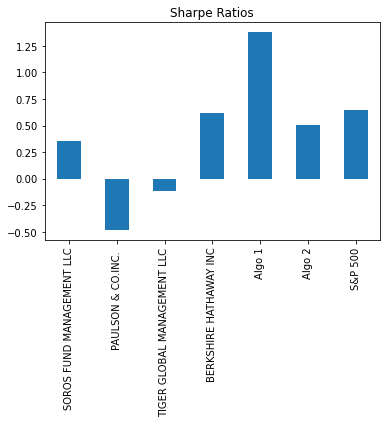

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_df.plot(kind = "bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: **Algo 1 outperformed the S&P 500 and all the whales. Algo 2 underperformed the S&P 500 and all the whales with the exception of Berkshire Hathaway Inc.**

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the AMZN stock data from .csv file
amzn_returns_csv = Path("amzn_data.csv")
amzn_returns_df = pd.read_csv(amzn_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
amzn_returns_df.rename(columns = {"Close":"NOCP"}, inplace = True)
amzn_returns_df.sort_index(ascending = True, inplace = True)
amzn_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,AMZN,753.67
2017-01-04,AMZN,757.18
2017-01-05,AMZN,780.45
2017-01-06,AMZN,795.99
2017-01-09,AMZN,796.92


In [33]:
# Read the NVDA stock data from .csv file
nvda_returns_csv = Path("nvda_data.csv")
nvda_returns_df = pd.read_csv(nvda_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
nvda_returns_df.rename(columns = {"Close":"NOCP"}, inplace = True)
nvda_returns_df.sort_index(ascending = True, inplace = True)
nvda_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,NVDA,102.01
2017-01-04,NVDA,104.39
2017-01-05,NVDA,101.74
2017-01-06,NVDA,103.10
2017-01-09,NVDA,107.28


In [34]:
# Read the PYPL stock data from .csv file
pypl_returns_csv = Path("pypl_data.csv")
pypl_returns_df = pd.read_csv(pypl_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
pypl_returns_df.rename(columns = {"Close":"NOCP"}, inplace = True)
pypl_returns_df.sort_index(ascending = True, inplace = True)
pypl_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,PYPL,40.25
2017-01-04,PYPL,41.00
2017-01-05,PYPL,41.06
2017-01-06,PYPL,41.45
2017-01-09,PYPL,41.40


In [35]:
# Read the REM stock data from .csv file
rem_returns_csv = Path("rem_data.csv")
rem_returns_df = pd.read_csv(rem_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
rem_returns_df.rename(columns = {"Close":"NOCP"}, inplace = True)
rem_returns_df.sort_index(ascending = True, inplace = True)
rem_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,REM,42.78
2017-01-04,REM,43.15
2017-01-05,REM,43.24
2017-01-06,REM,43.18
2017-01-09,REM,42.95


In [36]:
# Read the XOP stock data from .csv file
xop_returns_csv = Path("xop_data.csv")
xop_returns_df = pd.read_csv(xop_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
xop_returns_df.rename(columns = {"Close":"NOCP"}, inplace = True)
xop_returns_df.sort_index(ascending = True, inplace = True)
xop_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,XOP,168.04
2017-01-04,XOP,168.84
2017-01-05,XOP,168.32
2017-01-06,XOP,167.08
2017-01-09,XOP,162.40


In [38]:
# Concatenate all stocks into a single DataFrame
my_daily_returns_df = pd.concat([amzn_returns_df, nvda_returns_df, pypl_returns_df, rem_returns_df, xop_returns_df], axis = "rows", join = "inner")
my_daily_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2017-01-03,AMZN,753.67
2017-01-04,AMZN,757.18
2017-01-05,AMZN,780.45
2017-01-06,AMZN,795.99
2017-01-09,AMZN,796.92


In [44]:
# Reset the index
my_daily_returns_df.reset_index().head()

,Trade DATE,Symbol,NOCP
0,2017-01-03,AMZN,753.67
1,2017-01-04,AMZN,757.18
2,2017-01-05,AMZN,780.45
3,2017-01-06,AMZN,795.99
4,2017-01-09,AMZN,796.92


In [45]:
# Pivot so that each column of prices represents a unique symbol
my_daily_returns_df = my_daily_returns_df.pivot(columns="Symbol", values="NOCP")
my_daily_returns_df.head()

Symbol,AMZN,NVDA,PYPL,REM,XOP
Trade DATE,,,,,
2017-01-03,753.67,102.01,40.25,42.78,168.04
2017-01-04,757.18,104.39,41.00,43.15,168.84
2017-01-05,780.45,101.74,41.06,43.24,168.32
2017-01-06,795.99,103.10,41.45,43.18,167.08
2017-01-09,796.92,107.28,41.40,42.95,162.40


In [46]:
# Drop Nulls
my_daily_returns_df.dropna(inplace=True)
my_daily_returns_df.isnull().sum()

Symbol
AMZN    0
NVDA    0
PYPL    0
REM     0
XOP     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Calculate weighted portfolio returns
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
my_portfolio_df = my_daily_returns_df.dot(weights)
my_portfolio_returns_df = my_portfolio_df.pct_change()
my_portfolio_returns_df.dropna(inplace = True)
my_portfolio_returns_df.head()

Trade DATE
2017-01-04    0.007057
2017-01-05    0.018169
2017-01-06    0.014090
2017-01-09    0.000130
2017-01-10   -0.001738
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_returns_df = pd.concat((daily_returns_df, my_portfolio_returns_df), axis="columns", join="inner")
custom = combined_returns_df.columns[-1]
combined_returns_df = combined_returns_df.rename(columns={custom:"Custom"})
combined_returns_df.index.set_names("Date", inplace=True)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.007057
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,0.018169
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,0.014090
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,0.000130
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000,-0.001738


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df.dropna(inplace=True)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.007057
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,0.018169
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,0.014090
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,0.000130
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000,-0.001738


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [50]:
# Risk
combined_std_df = pd.DataFrame(combined_returns_df.std())
combined_std_df

,0
SOROS FUND MANAGEMENT LLC,0.007884
PAULSON & CO.INC.,0.006719
TIGER GLOBAL MANAGEMENT LLC,0.010630
BERKSHIRE HATHAWAY INC,0.012426
Algo 1,0.006489
Algo 2,0.007482
S&P 500,0.008163
Custom,0.016860


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

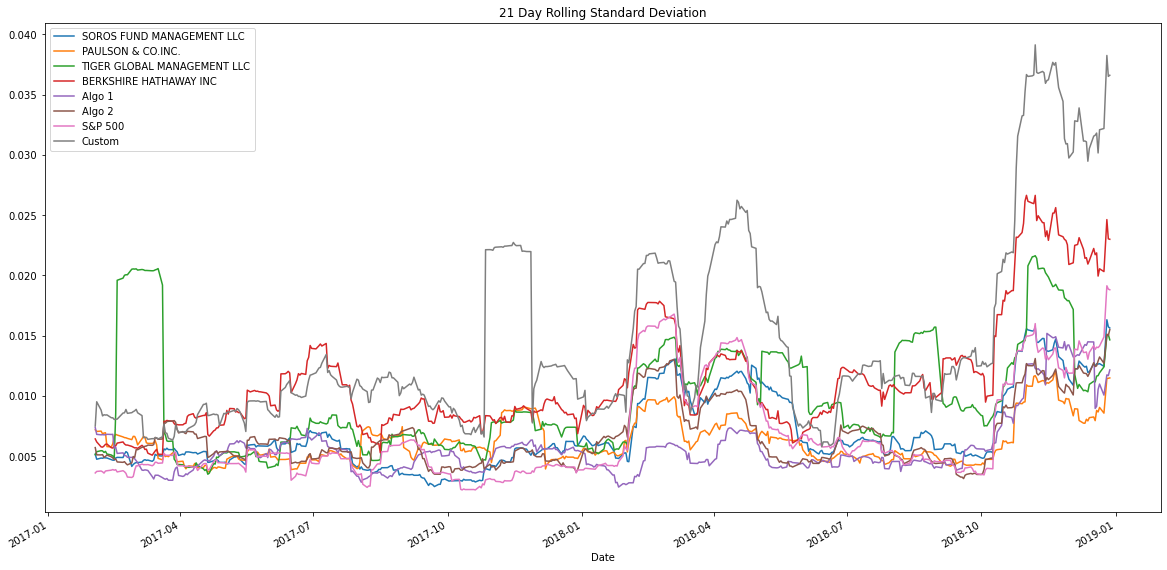

In [51]:
# Rolling
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

In [52]:
# Annualized Sharpe Ratios
combined_sharpe_ratio_df = combined_returns_df.mean()*252/(combined_returns_df.std()*np.sqrt(252))
combined_sharpe_ratio_df

SOROS FUND MANAGEMENT LLC     -0.064101
PAULSON & CO.INC.             -0.944235
TIGER GLOBAL MANAGEMENT LLC   -1.058845
BERKSHIRE HATHAWAY INC         0.734870
Algo 1                         0.717124
Algo 2                        -0.012428
S&P 500                        0.438961
Custom                         1.092038
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

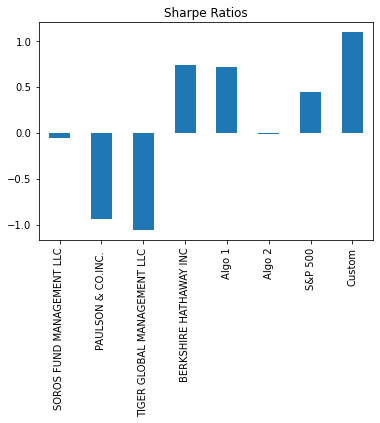

In [53]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio_df.plot(kind = "bar", title = "Sharpe Ratios")

In [54]:
# Create a correlation analysis
combined_correlation_df = combined_returns_df.corr()
combined_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.674886,0.537208,0.763043,0.303075,0.794463,0.813519,0.663049
PAULSON & CO.INC.,0.674886,1.000000,0.471794,0.557597,0.282783,0.710409,0.694501,0.506666
TIGER GLOBAL MANAGEMENT LLC,0.537208,0.471794,1.000000,0.411745,0.103316,0.505946,0.614355,0.357803
BERKSHIRE HATHAWAY INC,0.763043,0.557597,0.411745,1.000000,0.264611,0.733596,0.786001,0.773844
Algo 1,0.303075,0.282783,0.103316,0.264611,1.000000,0.298365,0.273119,0.286399
Algo 2,0.794463,0.710409,0.505946,0.733596,0.298365,1.000000,0.866021,0.663449
S&P 500,0.813519,0.694501,0.614355,0.786001,0.273119,0.866021,1.000000,0.763644
Custom,0.663049,0.506666,0.357803,0.773844,0.286399,0.663449,0.763644,1.000000


<AxesSubplot:title={'center':'Custom Portfolio Beta'}>

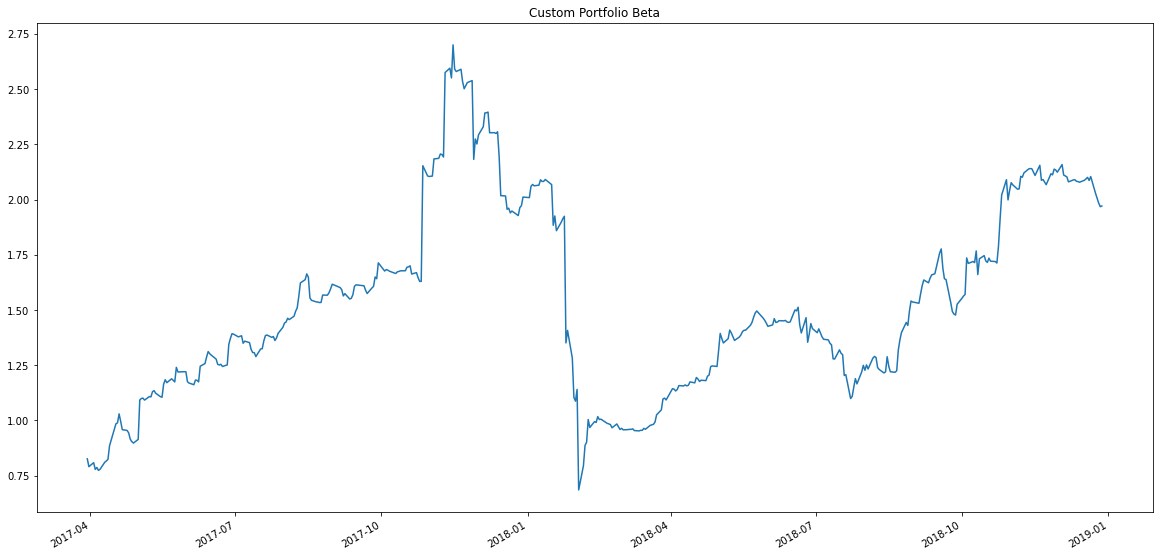

In [55]:
# Beta
my_portfolio_rolling_covariance_df = my_portfolio_returns_df.rolling(window=60).cov(daily_returns_df['S&P 500'])
my_portfolio_rolling_variance_df = daily_returns_df['S&P 500'].rolling(window=60).var()
my_portfolio_rolling_beta_df = my_portfolio_rolling_covariance_df / my_portfolio_rolling_variance_df
my_portfolio_rolling_beta_df.plot(figsize=(20, 10), title='Custom Portfolio Beta')

Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

**My Custom Portfolio has the highest sharpe ratio and the highest standard deviation to the the S&P 500 and all the other portfolio's in this excercise. Therefore, my Custom Portfolio is riskier than all the other portfolio's. However, due to the Custom Portfolio having the highest Sharpe Ratio, the Custom Portfolio was able to earn a higher return on a risk-adjusted basis.**